https://www.kaggle.com/datasets/nikhil7280/weather-type-classification



In [2]:
! kaggle datasets download -d nikhil7280/weather-type-classification

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 54.7MB/s]


In [3]:
! unzip weather-type-classification.zip

Archive:  weather-type-classification.zip
  inflating: weather_classification_data.csv  


In [4]:
import pandas as pd

# 데이터셋 로드
data = pd.read_csv('weather_classification_data.csv')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
print("#"*10)
print("데이터의 처음 몇 줄을 출력하여 구조 확인")
print(data.head())

# 데이터의 각 컬럼에 대한 정보 확인
print("#"*10)
print("데이터의 각 컬럼에 대한 정보 확인")
print(data.info())

##########
데이터의 처음 몇 줄을 출력하여 구조 확인
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4 

### 히트맵(HeatMap)





In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Weather Type'] = le.fit_transform(data['Weather Type'])
data['Location'] = le.fit_transform(data['Location'])
data['Cloud Cover'] = le.fit_transform(data['Cloud Cover'])
data['Season'] = le.fit_transform(data['Season'])

In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1.990227,1005.827896,4.005758,1.849394,5.462917,1.094091,1.500000
std,17.386327,20.194248,6.908704,31.946541,1.012302,37.199589,3.856600,1.164824,3.371499,0.791420,1.118076
min,-25.000000,20.000000,0.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,2.000000,994.800000,1.000000,1.000000,3.000000,0.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,2.000000,1007.650000,3.000000,2.000000,5.000000,1.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,3.000000,1016.772500,7.000000,3.000000,7.500000,2.000000,2.250000
max,109.000000,109.000000,48.500000,109.000000,3.000000,1199.210000,14.000000,3.000000,20.000000,2.000000,3.000000


In [ ]:
data['Weather Type'].value_counts()

Weather Type
1    3300
0    3300
3    3300
2    3300
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(13200, 11)

In [ ]:
data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [ ]:
data.corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
Temperature,1.000000,-0.207969,-0.070022,-0.287206,-0.224642,0.209188,0.374773,-0.377942,0.250751,-0.196108,0.028923
Humidity,-0.207969,1.000000,0.406079,0.638631,0.277199,-0.120653,-0.342694,0.189145,-0.479969,0.079968,-0.250558
Wind Speed,-0.070022,0.406079,1.000000,0.443770,0.183863,-0.077757,-0.068147,0.058676,-0.311828,0.014091,-0.166485
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,0.267368,-0.177444,-0.291601,0.210372,-0.457444,0.091911,-0.161578
Cloud Cover,-0.224642,0.277199,0.183863,0.267368,1.000000,-0.096133,-0.347301,0.076947,-0.169604,0.030464,-0.536681
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,-0.096133,1.000000,0.154128,-0.126795,0.120182,-0.077053,0.030679
UV Index,0.374773,-0.342694,-0.068147,-0.291601,-0.347301,0.154128,1.000000,-0.201870,0.362922,-0.100510,0.345804
Season,-0.377942,0.189145,0.058676,0.210372,0.076947,-0.126795,-0.201870,1.000000,-0.231691,0.147115,0.118791
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,-0.169604,0.120182,0.362922,-0.231691,1.000000,-0.093642,0.047448
Location,-0.196108,0.079968,0.014091,0.091911,0.030464,-0.077053,-0.100510,0.147115,-0.093642,1.000000,0.071665


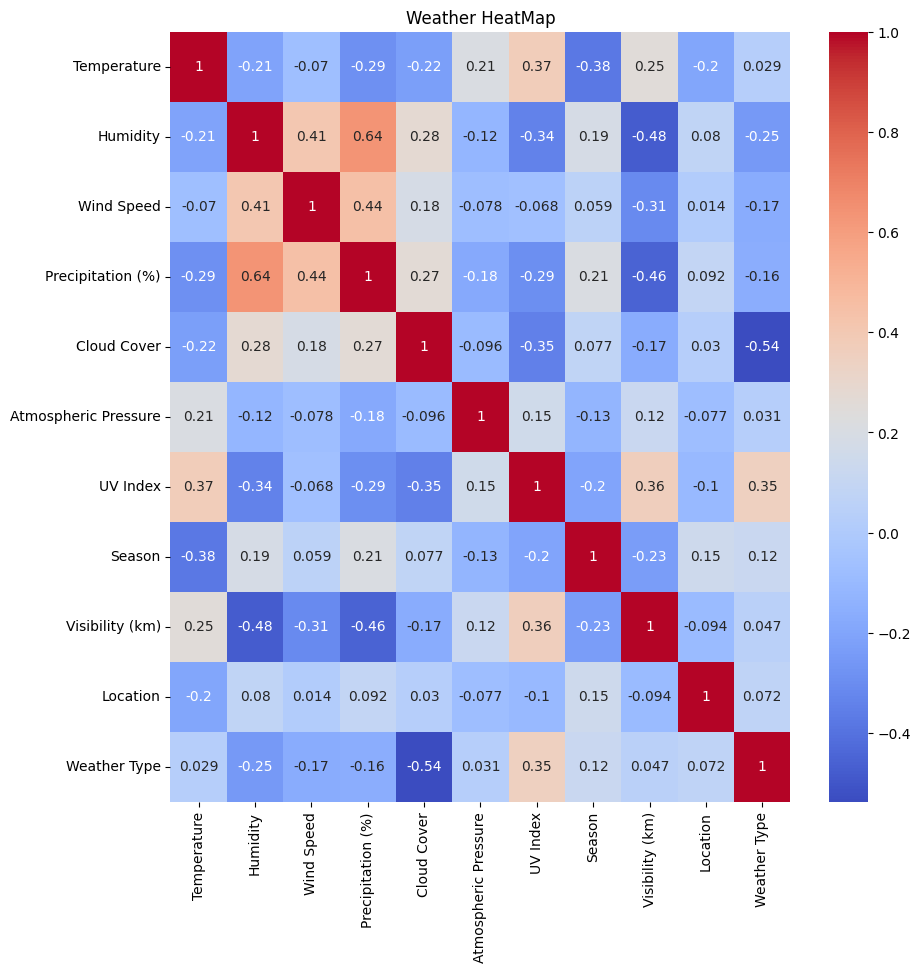

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 생성
# data = np.random.rand(10, 12)

# 히트맵 생성
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Weather HeatMap')
plt.show()

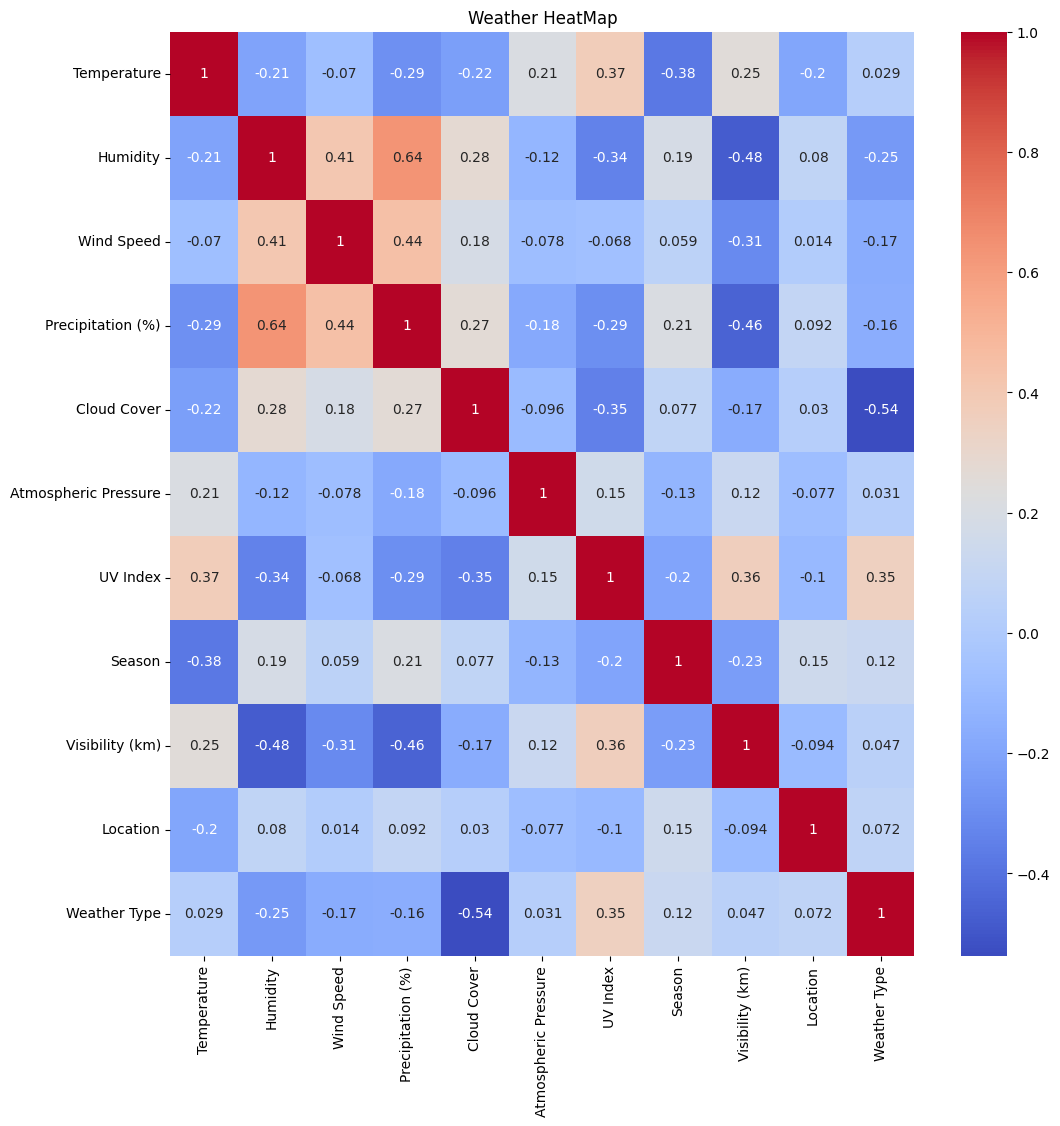

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Weather HeatMap')
plt.show()

### 트리맵(TreeMap)

In [ ]:
import plotly.express as px
import numpy as np
#df = px.data.gapminder().query("year == 2007")
#fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
#                  color='lifeExp', hover_data=['iso_alpha'],
#                  color_continuous_scale='RdBu',
#                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
#fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
#fig.show()

precipitation_sum = data.groupby(['Cloud Cover', 'Season', 'Weather Type'])['Precipitation (%)'].max().reset_index()
precipitation_sum

,Cloud Cover,Season,Weather Type,Precipitation (%)
0,clear,Autumn,Sunny,109.0
1,clear,Spring,Sunny,109.0
2,clear,Summer,Sunny,108.0
3,clear,Winter,Sunny,109.0
4,cloudy,Autumn,Cloudy,95.0
5,cloudy,Autumn,Rainy,98.0
6,cloudy,Autumn,Snowy,90.0
7,cloudy,Autumn,Sunny,96.0
8,cloudy,Spring,Cloudy,96.0
9,cloudy,Spring,Rainy,99.0


In [ ]:
fig = px.treemap(precipitation_sum, path=['Season', 'Cloud Cover', 'Weather Type'], values='Precipitation (%)', color='Precipitation (%)')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

https://blog.naver.com/breezehome50/222306646874


### 버블차트(Bubble Chart)

In [ ]:
sd = data[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)','Weather Type']]

In [ ]:
categorical_cols=data.select_dtypes(exclude='number').columns
print(f"Categorical Columns: {categorical_cols}")

Categorical Columns: Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')


In [ ]:
data.describe(exclude="number")

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


In [ ]:
numerical_cols=data.select_dtypes(include='number').columns
print(f"Numerical Columns: {numerical_cols}")

Numerical Columns: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
sd_g = sd.groupby('Weather Type').mean()

In [ ]:
sd_g

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Weather Type,,,,,,,
Cloudy,22.823636,66.528788,8.601818,40.286364,1010.170724,3.583939,7.071212
Rainy,22.788182,78.397879,13.677576,74.752424,1004.149848,2.684242,3.628485
Snowy,-1.530606,78.510303,10.976212,74.586061,991.051842,1.950303,3.591515
Sunny,32.429091,51.406364,6.073182,24.952727,1017.939170,7.804545,7.560455


In [ ]:
sd_g.loc['Sunny']

32.42909090909091

In [ ]:
sd_g = sd_g.reindex(['Spring','Summer','Autumn','Winter'])
sd_g

,Temperature,Wind Speed
Season,,
Spring,25.645881,9.149923
Summer,26.002408,9.594703
Autumn,25.797600,9.552800
Winter,10.082709,10.378164


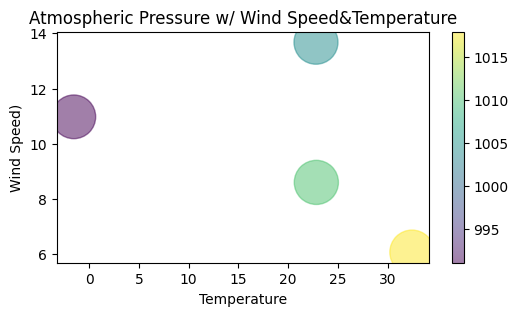

In [ ]:
import matplotlib.pyplot as plt

# 샘플 데이터 정의
x = (sd_g['Temperature'].values).tolist()
y = (sd_g['Wind Speed'].values).tolist()
sizes = (sd_g['Atmospheric Pressure'].values).tolist()

# 버블 차트 생성
plt.figure(figsize=(6, 3))
plt.scatter(x, y, s=sizes, alpha=0.5, c=sizes, cmap='viridis')
plt.title('Atmospheric Pressure w/ Wind Speed&Temperature')
plt.xlabel('Temperature')
plt.ylabel('Wind Speed)')
plt.colorbar()
plt.show()


### Radar Chart

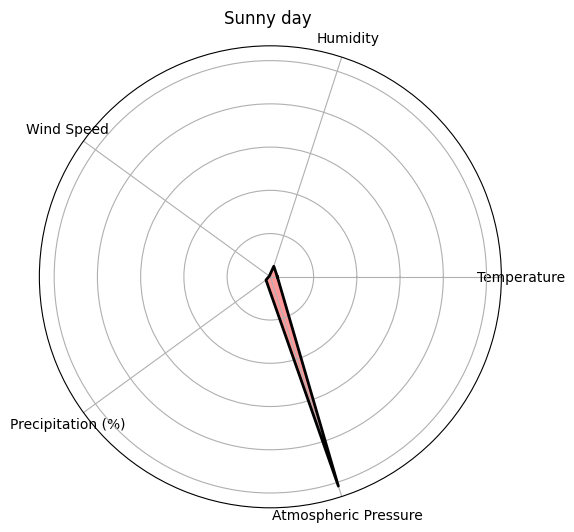

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 샘플 데이터 정의
labels = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure']
values = [sd_g.loc['Sunny']['Temperature'], sd_g.loc['Sunny']['Humidity'], sd_g.loc['Sunny']['Wind Speed'], sd_g.loc['Sunny']['Precipitation (%)'],
          sd_g.loc['Sunny']['Atmospheric Pressure']]
values += values[:1]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# 레이더 차트 생성
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.4)
ax.plot(angles, values, color='black', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Sunny day ')
plt.show()

### Sanky Diagram

In [ ]:
sankyDiagram_data = data[['Cloud Cover','Precipitation (%)','Weather Type']]
sankyDiagram_data

,Cloud Cover,Precipitation (%),Weather Type
0,partly cloudy,82.0,Rainy
1,partly cloudy,71.0,Cloudy
2,clear,16.0,Sunny
3,clear,82.0,Sunny
4,overcast,66.0,Rainy
...,...,...,...
13195,overcast,71.0,Rainy
13196,cloudy,23.0,Snowy
13197,overcast,28.0,Cloudy
13198,overcast,94.0,Snowy


In [ ]:
import plotly.graph_objects as go
import plotly.express as pex
import numpy as np

#table2=sankyDiagram_data['Precipitation (%)']
#table2['Cloud Cover']=sankyDiagram_data['Cloud Cover'].apply(lambda x:x+'CloudCover')
#table2['Weather Type']=sankyDiagram_data['Weather Type'].apply(lambda x:x+'WeatherType')

all_nodes = sankyDiagram_data['Cloud Cover'].values.tolist() + sankyDiagram_data['Weather Type'].values.tolist()
source_indices = [all_nodes.index(a) for a in sankyDiagram_data['Cloud Cover']]
target_indices = [all_nodes.index(b) for b in sankyDiagram_data['Weather Type']]

colors = pex.colors.qualitative.D3

node_colors_mappings = dict([(node,np.random.choice(colors)) for node in all_nodes])
node_colors = [node_colors_mappings[node] for node in all_nodes]
edge_colors = [node_colors_mappings[node] for node in sankyDiagram_data['Cloud Cover']]

# 샘플 데이터 정의
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color =  node_colors,
    ),

    link = dict(
      source =  source_indices,
      target =  target_indices,
      value =  sankyDiagram_data['Precipitation (%)'],
      color = edge_colors,
)))

#fig.show()
fig.update_layout(title_text="Cloudy Cover & Weather Type w/ precipitation(%)", font_size=10)
fig.show()

### 인터렉티브 시각화 (확대)

In [ ]:
import plotly.express as px
import pandas as pd

# 샘플 데이터 생성
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June'],
    'Sales': [150, 200, 180, 220, 250, 230]
}
df = pd.DataFrame(data)

# 인터랙티브 선 그래프 생성
fig = px.line(df, x='Month', y='Sales', title='Monthly Sales')
fig.show()

### 시각화 요소를 통한 설득력 있는 이야기 구성

- 시각적 강조

In [21]:
cloudcover_label = data['Cloud Cover'].unique().tolist()
cloudcover_label

['partly cloudy', 'clear', 'overcast', 'cloudy']

In [24]:
cloudcover_counts = [0, 0, 0, 0]

for couldtype in data['Cloud Cover']:
    if couldtype == 'partly cloudy':
        cloudcover_counts[0] += 1
    elif couldtype == 'clear':
        cloudcover_counts[1] += 1
    elif couldtype == 'overcast':
        cloudcover_counts[2] += 1
    elif couldtype == 'cloudy':
        cloudcover_counts[3] += 1

cloudcover_counts

[4560, 2139, 6090, 411]

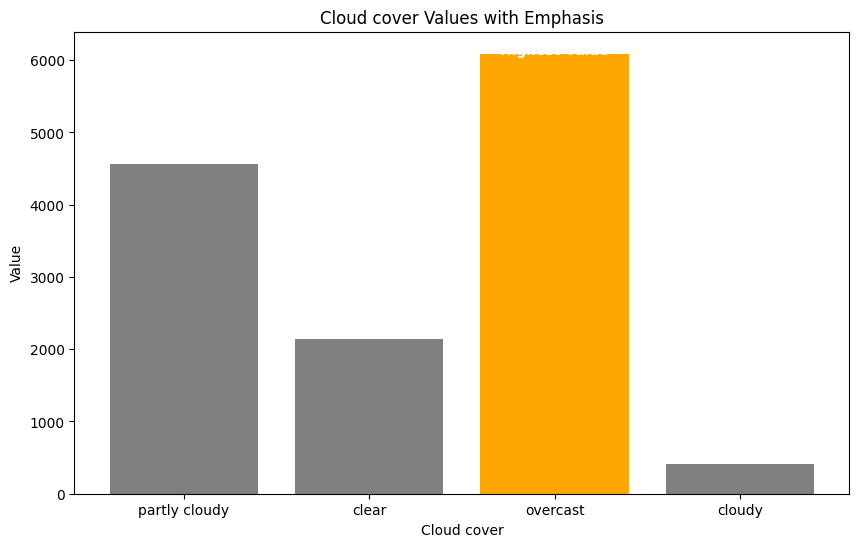

In [25]:
import matplotlib.pyplot as plt

# 데이터 정의
categories = cloudcover_label
values = cloudcover_counts

# 강조할 데이터
highlight = [False, False, True, False]

# 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=['grey' if not h else 'orange' for h in highlight])
plt.title('Cloud cover Values with Emphasis')
plt.xlabel('Cloud cover')
plt.ylabel('Value')

# 강조할 데이터 포인트에 텍스트 추가
for bar in bars:
    if bar.get_height() == max(values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, 'Highest Value', ha='center', color='white', weight='bold')

plt.show()

### 시각화 요소를 통한 설득력 있는 이야기 구성

- 애니메이션


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# 데이터 정의
fig, ax = plt.subplots()
x = np.arange(0, 10, 0.1)
line, = ax.plot(x, np.sin(x))

# 애니메이션 함수
def update(num, x, line):
    line.set_ydata(np.sin(x + num / 10.0))
    return line,

ani = animation.FuncAnimation(fig, update, frames=100, fargs=[x, line], interval=50)
plt.title('Sine Wave Animation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

from matplotlib import rc
rc('animation', html='jshtml')
ani

Output hidden; open in https://colab.research.google.com to view.

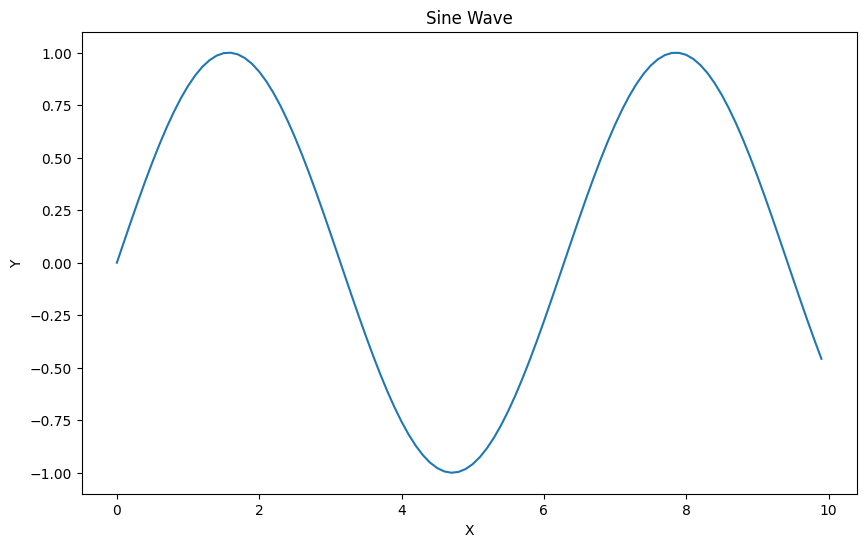

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의
x = np.arange(0, 10, 0.1)
y = np.sin(x)

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 시각화 요소를 통한 설득력 있는 이야기 구성

- 비주얼 히스토리

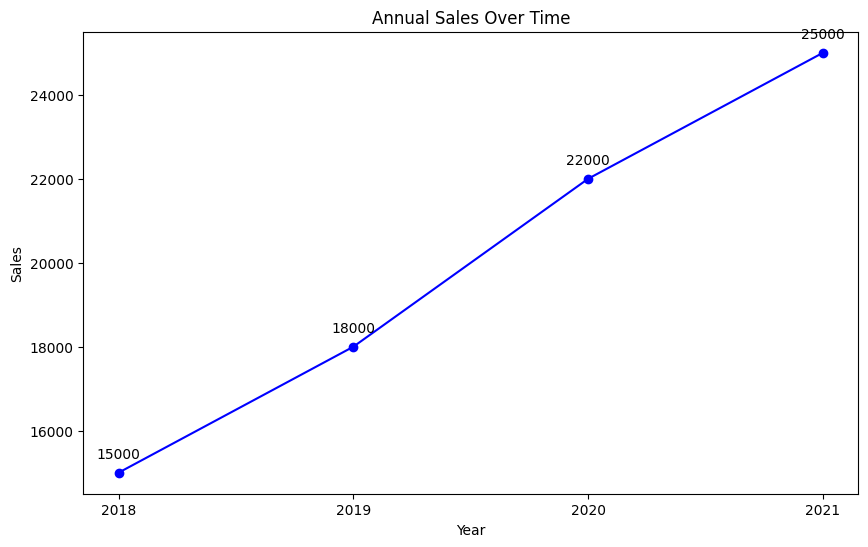

In [ ]:
import matplotlib.pyplot as plt

# 데이터 정의
years = ['2018', '2019', '2020', '2021']
sales = [15000, 18000, 22000, 25000]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(years, sales, marker='o', linestyle='-', color='b')
plt.title('Annual Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
for i, txt in enumerate(sales):
    plt.annotate(txt, (years[i], sales[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

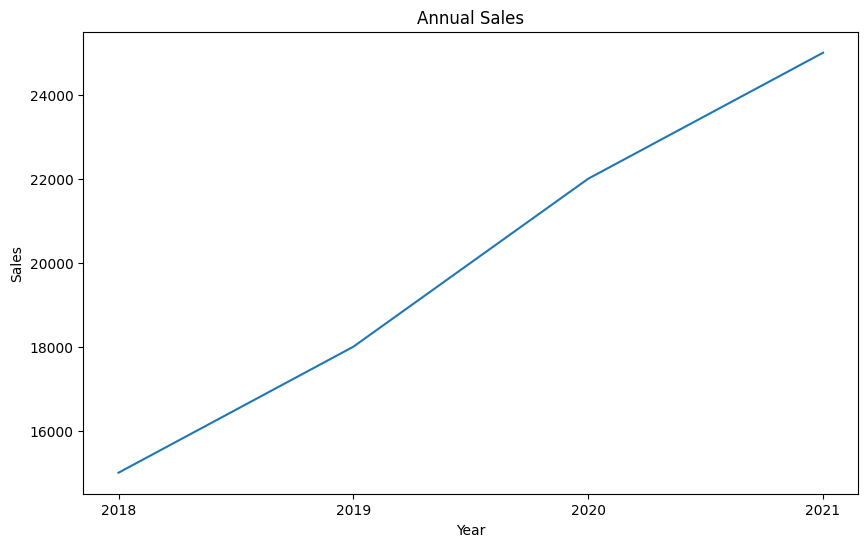

In [ ]:
import matplotlib.pyplot as plt

# 데이터 정의
years = ['2018', '2019', '2020', '2021']
sales = [15000, 18000, 22000, 25000]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(years, sales)
plt.title('Annual Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()
